# UMAP in Python: Advanced Dimensionality Reduction
## What is UMAP?
UMAP (Uniform Manifold Approximation and Projection) is a state-of-the-art dimensionality reduction technique that excels at preserving both local and global structure in data. Unlike PCA (which is linear) or t-SNE (which only preserves local structure), UMAP provides a better balance between maintaining neighborhood relationships and overall data topology.
## UMAP is based on manifold learning and topological data analysis, making it powerful for:

- Visualization: Creating meaningful 2D/3D projections
- Clustering: Revealing natural groupings in data
- Preprocessing: Reducing dimensions before machine learning
- Exploration: Understanding complex, high-dimensional datasets

## Why Choose UMAP?
### Advantages over PCA:

- Captures non-linear relationships
- Better preserves local structure
- More interpretable clusters

### Advantages over t-SNE:

- Faster computation (especially for large datasets)
- Preserves more global structure
- More stable and reproducible
- Can work with new data (transform method)

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


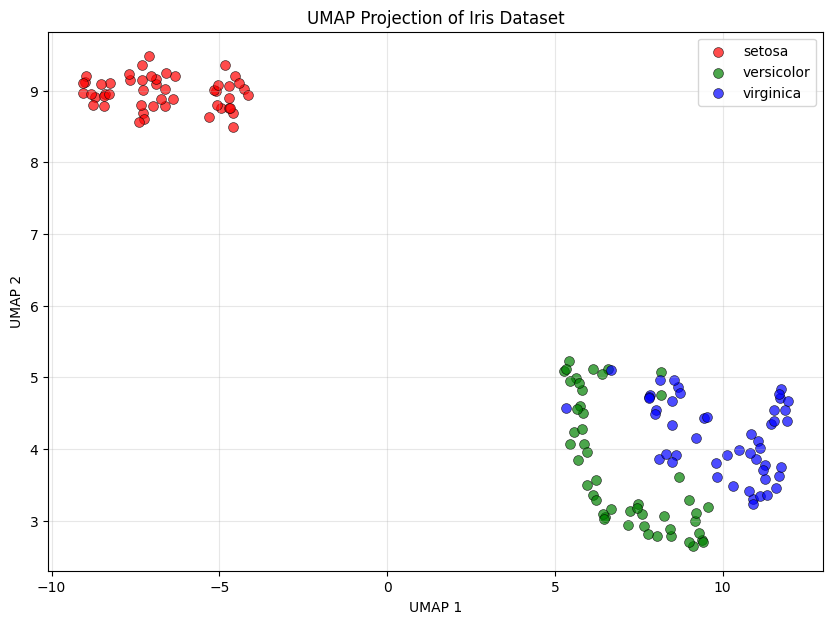

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import umap

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(embedding[y == i, 0], embedding[y == i, 1],
                color=colors[i], alpha=0.7, s=50,
                label=target_name, edgecolors='black', linewidth=0.5)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection of Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Comparing UMAP, PCA, and t-SNE
Let's visualize the differences between these three popular methods:

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/3934828058.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


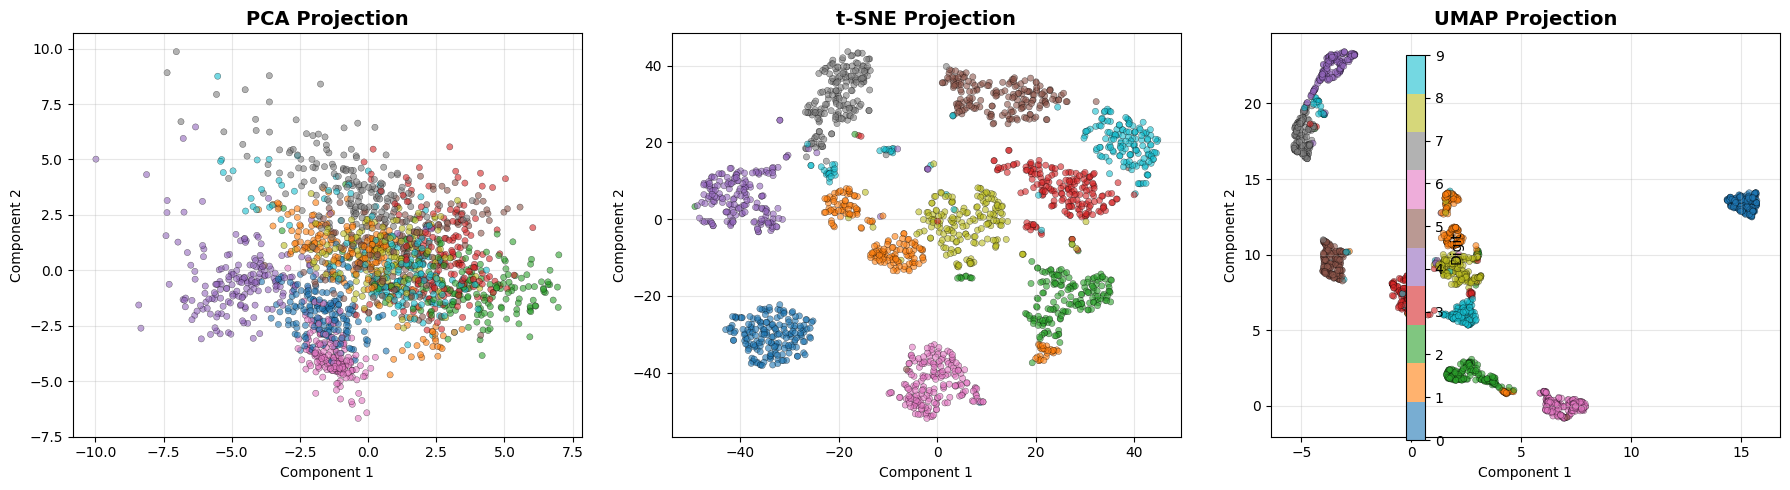

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Apply different methods
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, data, title in zip(axes,
                            [X_pca, X_tsne, X_umap],
                            ['PCA', 't-SNE', 'UMAP']):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='tab10',
                        alpha=0.6, s=20, edgecolors='black', linewidth=0.3)
    ax.set_title(f'{title} Projection', fontsize=14, fontweight='bold')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Digit', ticks=range(10))
plt.tight_layout()
plt.show()

# Understanding UMAP Parameters
UMAP has several key parameters that control the projection:
1. n_neighbors: Local vs Global Structure

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/2865945170.py:32: UserWarning: This figure includes Axes that are not c

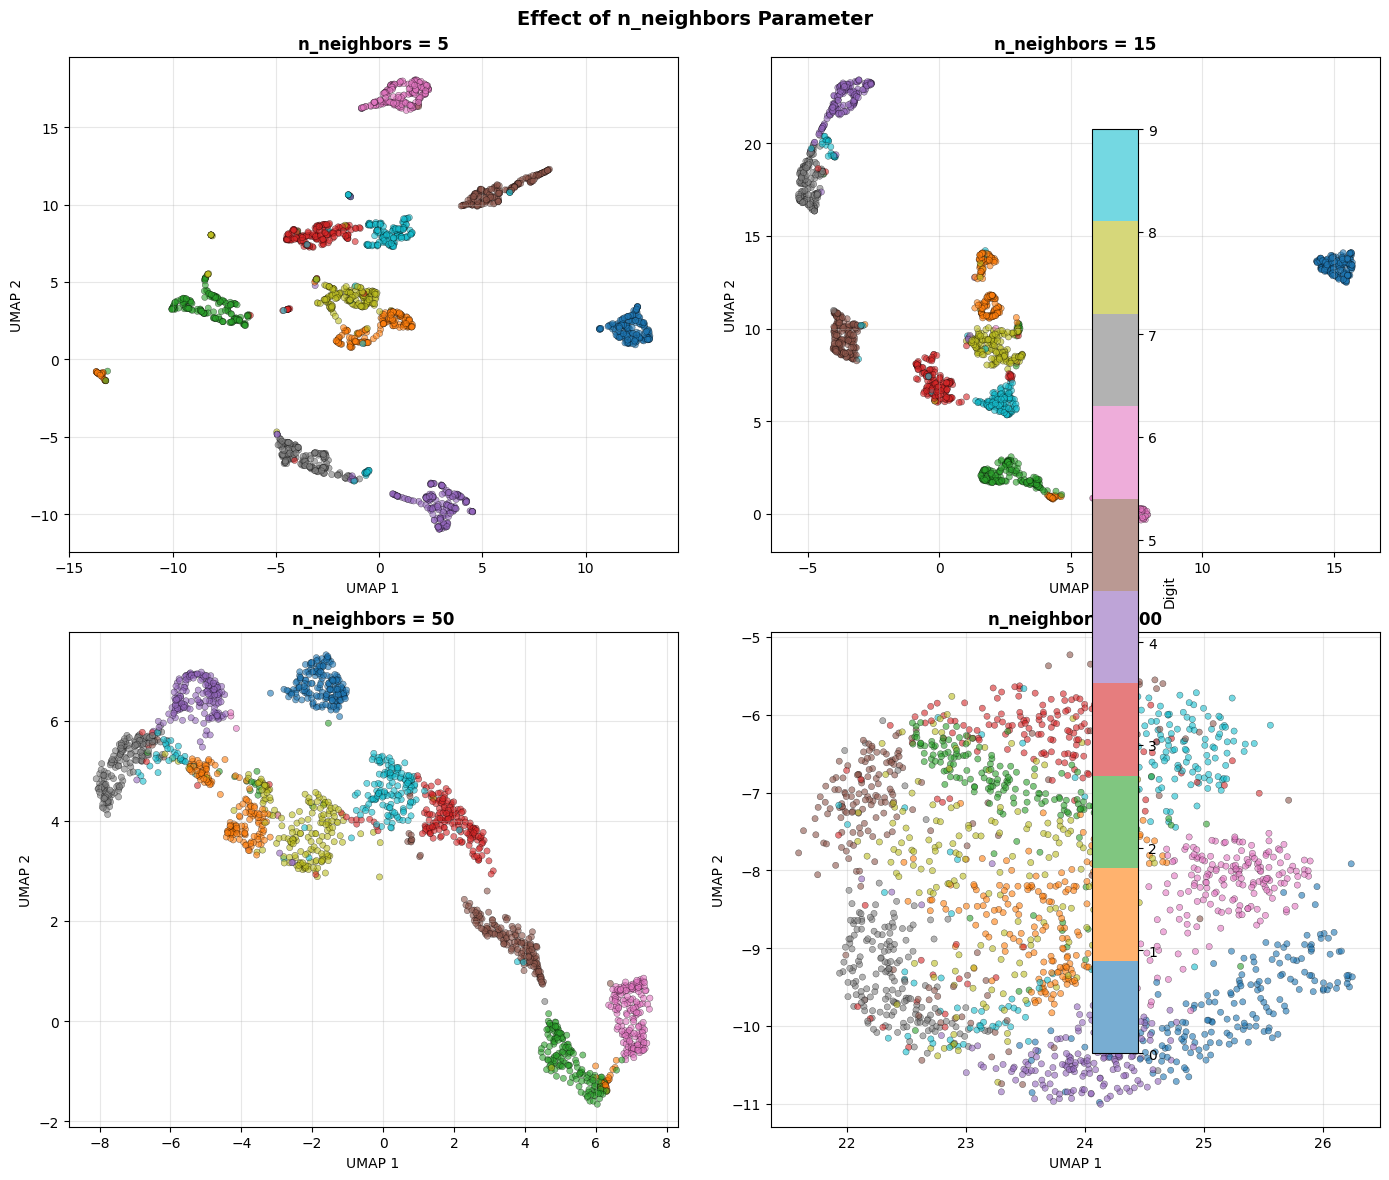

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

# Load and prepare data
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
y = digits.target

# Different n_neighbors values
n_neighbors_values = [5, 15, 50, 200]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(X_scaled)

    scatter = axes[idx].scatter(embedding[:, 0], embedding[:, 1],
                               c=y, cmap='tab10', alpha=0.6, s=20,
                               edgecolors='black', linewidth=0.3)
    axes[idx].set_title(f'n_neighbors = {n_neighbors}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('UMAP 1')
    axes[idx].set_ylabel('UMAP 2')
    axes[idx].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Digit', ticks=range(10))
plt.suptitle('Effect of n_neighbors Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Interpretation:

- Low n_neighbors (5-15): Emphasizes local structure, more fragmented clusters
- Medium n_neighbors (15-50): Balanced view, good for most cases
- High n_neighbors (50+): Emphasizes global structure, broader patterns

2. min_dist: Cluster Tightness

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/1678901556.py:32: UserWarning: This figure includes Axes that are not c

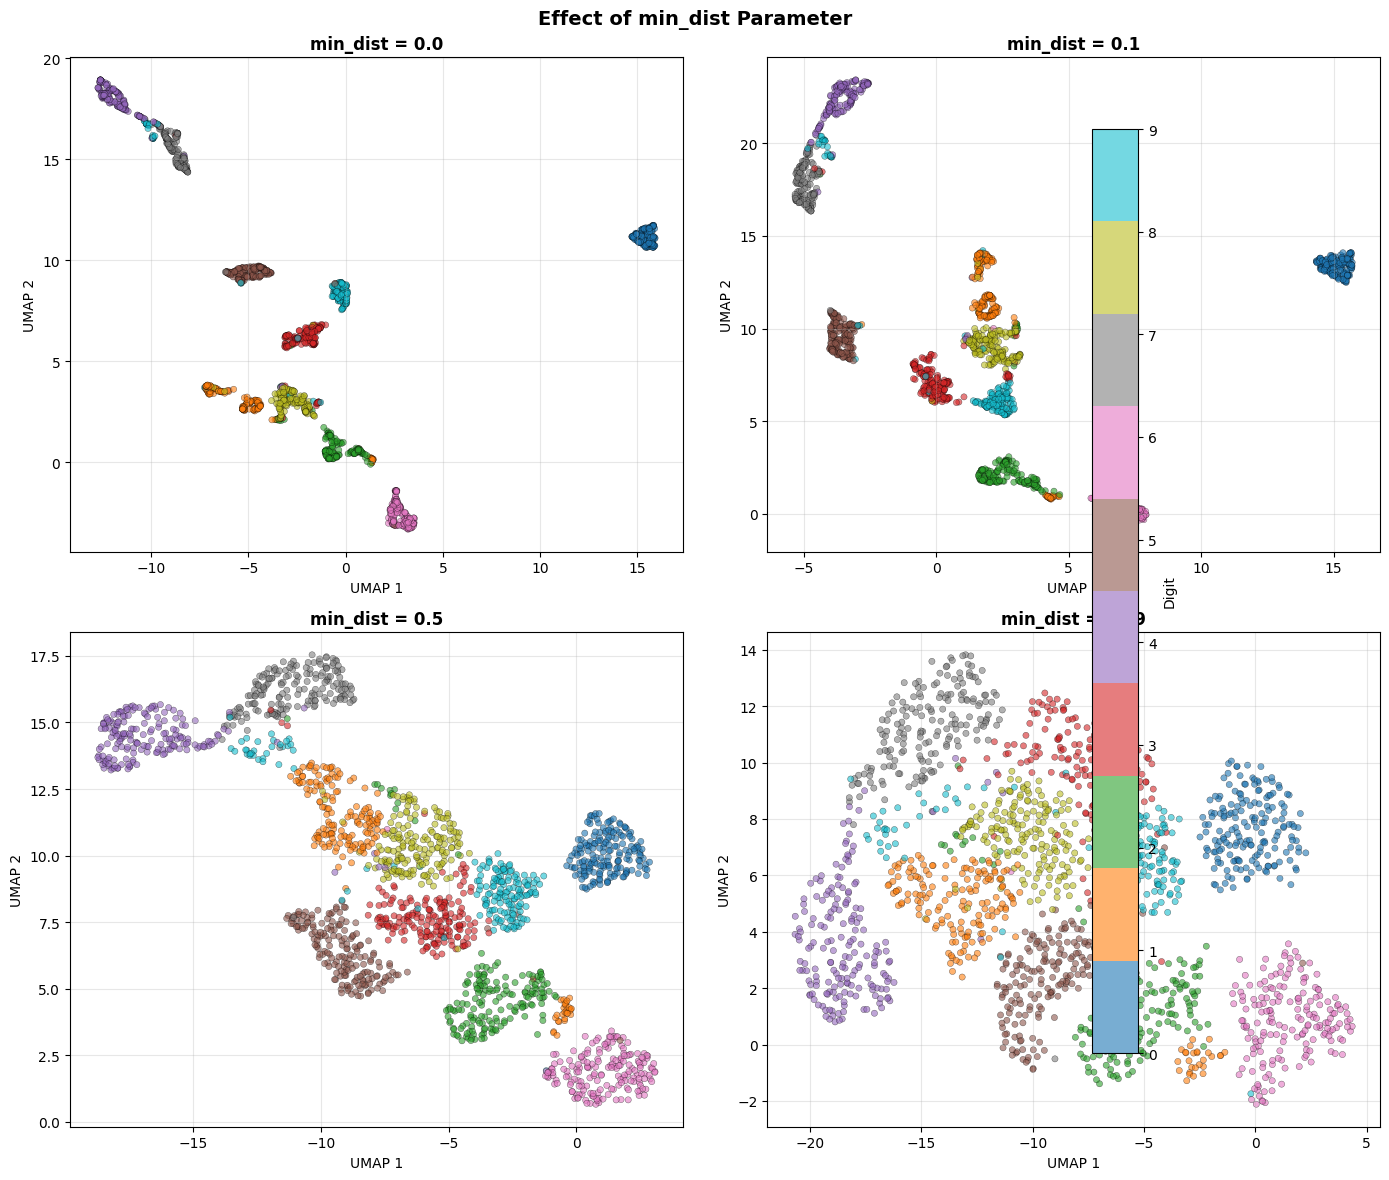

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

# Load and prepare data
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
y = digits.target

# Different min_dist values
min_dist_values = [0.0, 0.1, 0.5, 0.99]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, min_dist in enumerate(min_dist_values):
    reducer = umap.UMAP(min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(X_scaled)

    scatter = axes[idx].scatter(embedding[:, 0], embedding[:, 1],
                               c=y, cmap='tab10', alpha=0.6, s=20,
                               edgecolors='black', linewidth=0.3)
    axes[idx].set_title(f'min_dist = {min_dist}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('UMAP 1')
    axes[idx].set_ylabel('UMAP 2')
    axes[idx].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Digit', ticks=range(10))
plt.suptitle('Effect of min_dist Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Interpretation:

- min_dist = 0.0: Tight, clumped clusters
- min_dist = 0.1-0.3: Default, balanced separation
- min_dist = 0.5+: More spread out, looser clusters

3. Metric: Distance Functions

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/2639804678.py:32: UserWarning: This figure includes Axes that are not c

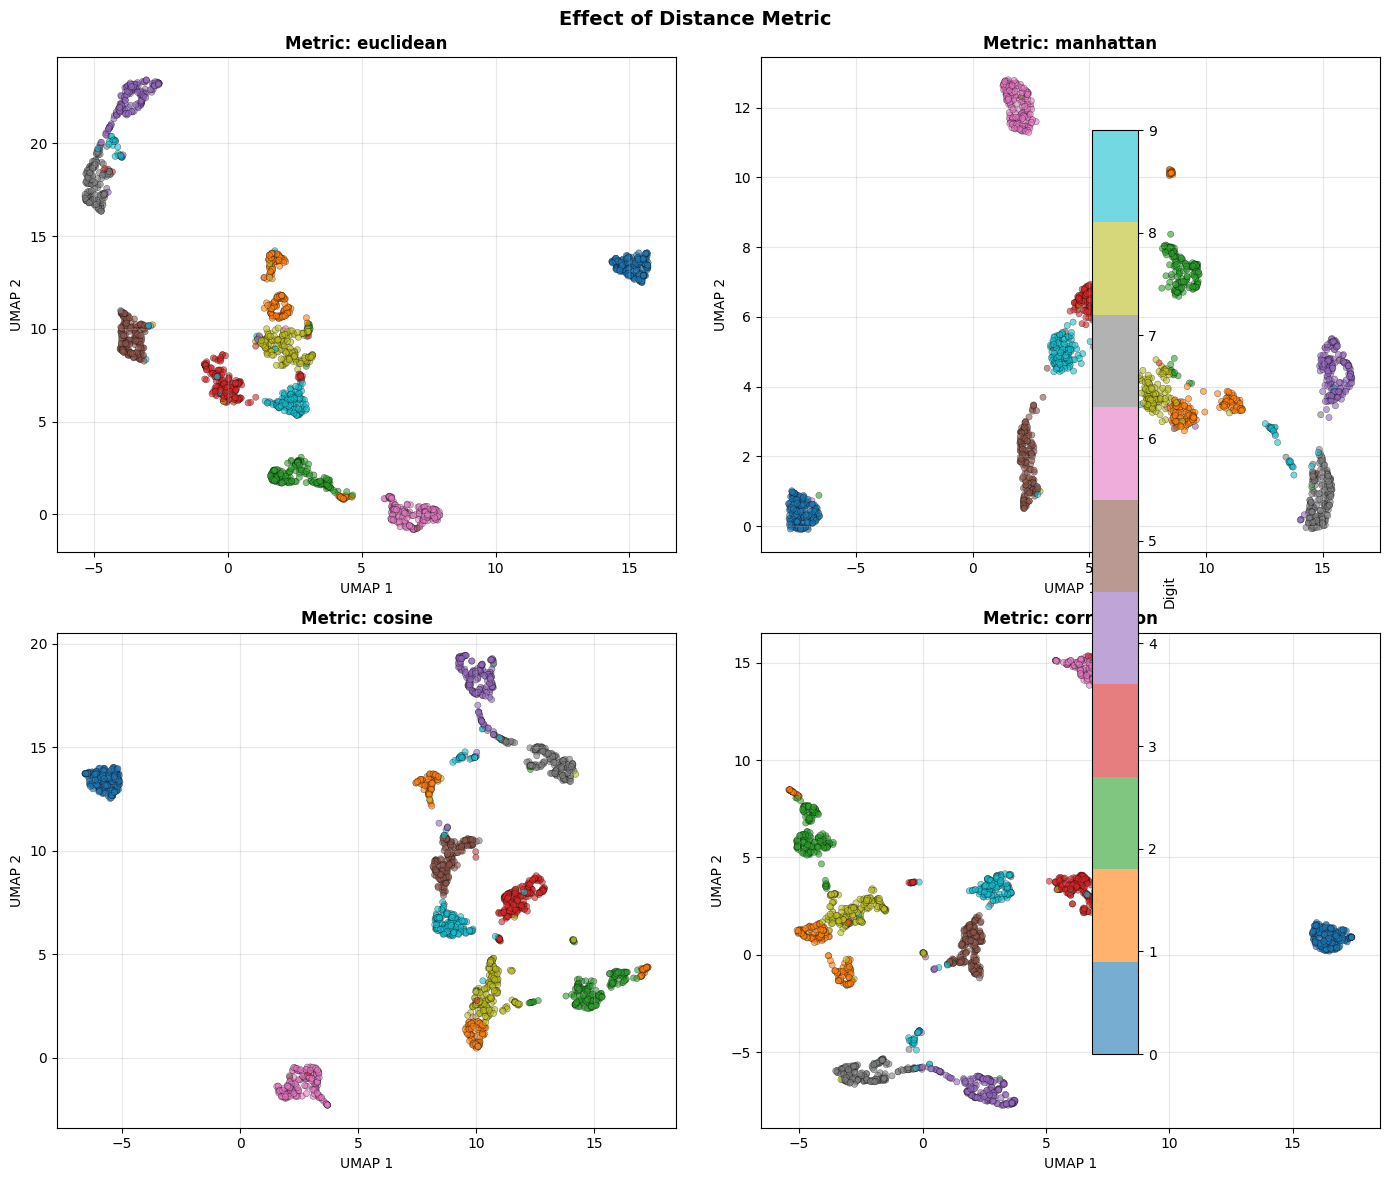

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

# Load and prepare data
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
y = digits.target

# Different metrics
metrics = ['euclidean', 'manhattan', 'cosine', 'correlation']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    reducer = umap.UMAP(metric=metric, random_state=42)
    embedding = reducer.fit_transform(X_scaled)

    scatter = axes[idx].scatter(embedding[:, 0], embedding[:, 1],
                               c=y, cmap='tab10', alpha=0.6, s=20,
                               edgecolors='black', linewidth=0.3)
    axes[idx].set_title(f'Metric: {metric}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('UMAP 1')
    axes[idx].set_ylabel('UMAP 2')
    axes[idx].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Digit', ticks=range(10))
plt.suptitle('Effect of Distance Metric', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3D UMAP Projection
Visualizing in three dimensions for additional insight:

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


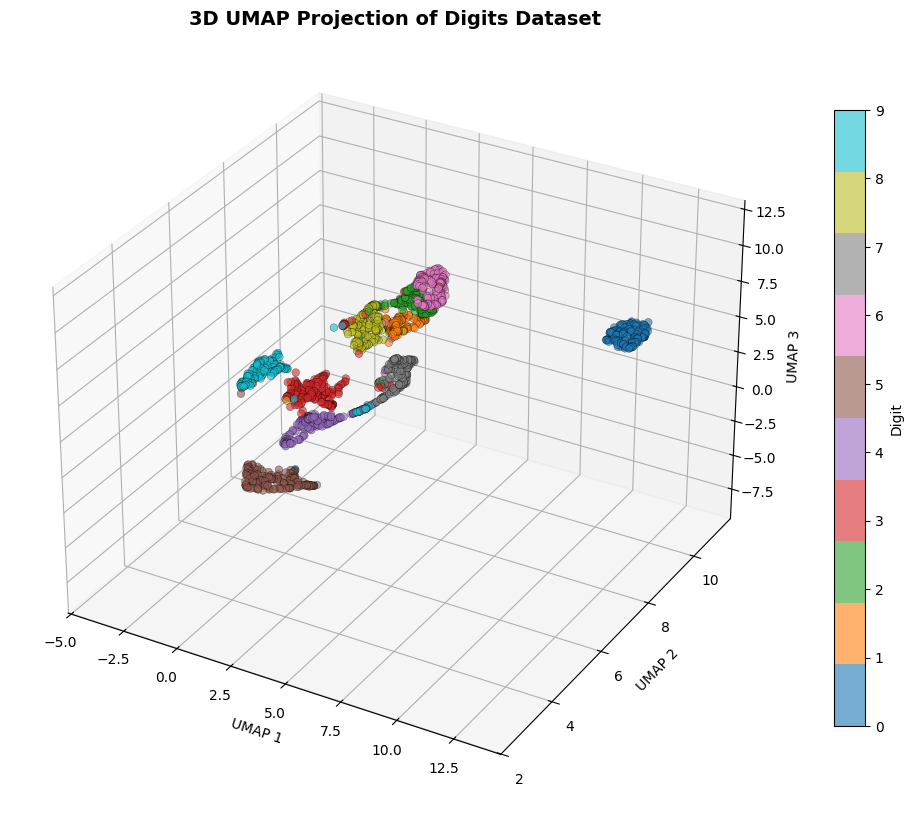

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

# Load and prepare data
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
y = digits.target

# Apply 3D UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                     c=y, cmap='tab10', s=30, alpha=0.6,
                     edgecolors='black', linewidth=0.3)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title('3D UMAP Projection of Digits Dataset', fontsize=14, fontweight='bold')

plt.colorbar(scatter, label='Digit', ticks=range(10), shrink=0.8)
plt.show()

# UMAP for High-Dimensional Data
Example with the MNIST-like digits dataset (64 dimensions):

Original shape: (1797, 64)
Number of features: 64


/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/390077629.py:46: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


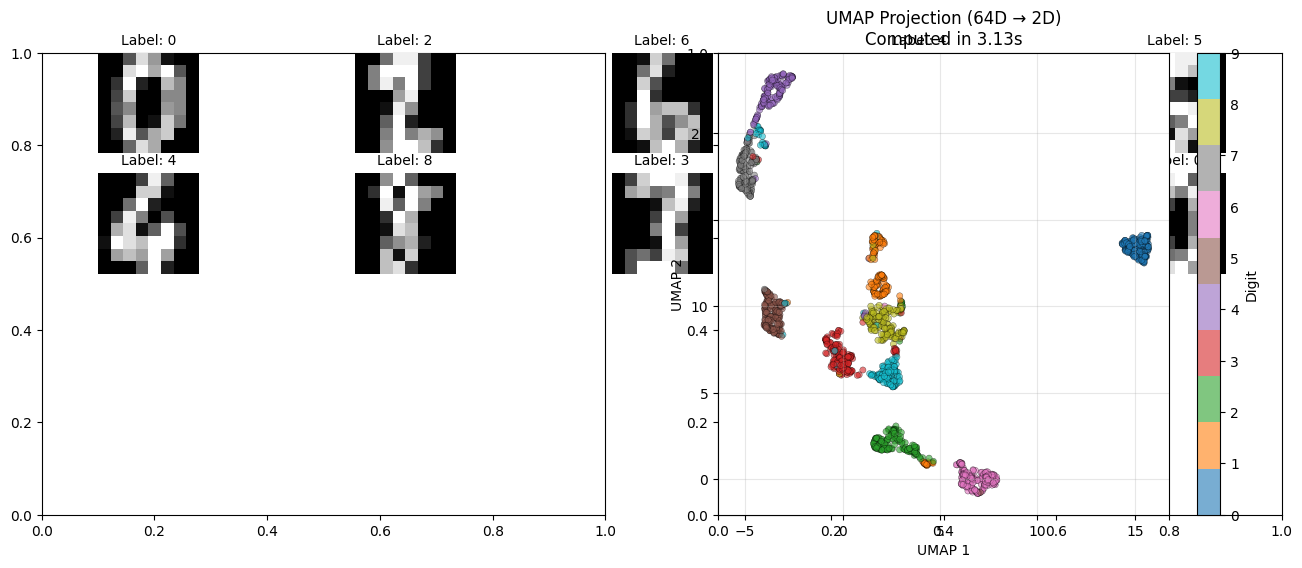

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap
import time

# Load data
digits = load_digits()
X = digits.data
y = digits.target

print(f"Original shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Time the reduction
start_time = time.time()
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)
elapsed_time = time.time() - start_time

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sample original images
for i in range(10):
    ax = fig.add_subplot(4, 5, i + 1)
    ax.imshow(digits.images[i*180], cmap='gray')
    ax.set_title(f'Label: {y[i*180]}', fontsize=10)
    ax.axis('off')

# UMAP projection
ax_umap = fig.add_subplot(1, 2, 2)
scatter = ax_umap.scatter(embedding[:, 0], embedding[:, 1],
                          c=y, cmap='tab10', alpha=0.6, s=20,
                          edgecolors='black', linewidth=0.3)
ax_umap.set_xlabel('UMAP 1')
ax_umap.set_ylabel('UMAP 2')
ax_umap.set_title(f'UMAP Projection (64D → 2D)\nComputed in {elapsed_time:.2f}s')
ax_umap.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax_umap, label='Digit', ticks=range(10))
plt.tight_layout()
plt.show()

# UMAP with Supervised Learning
UMAP can use label information to create better projections:

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/4006100399.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


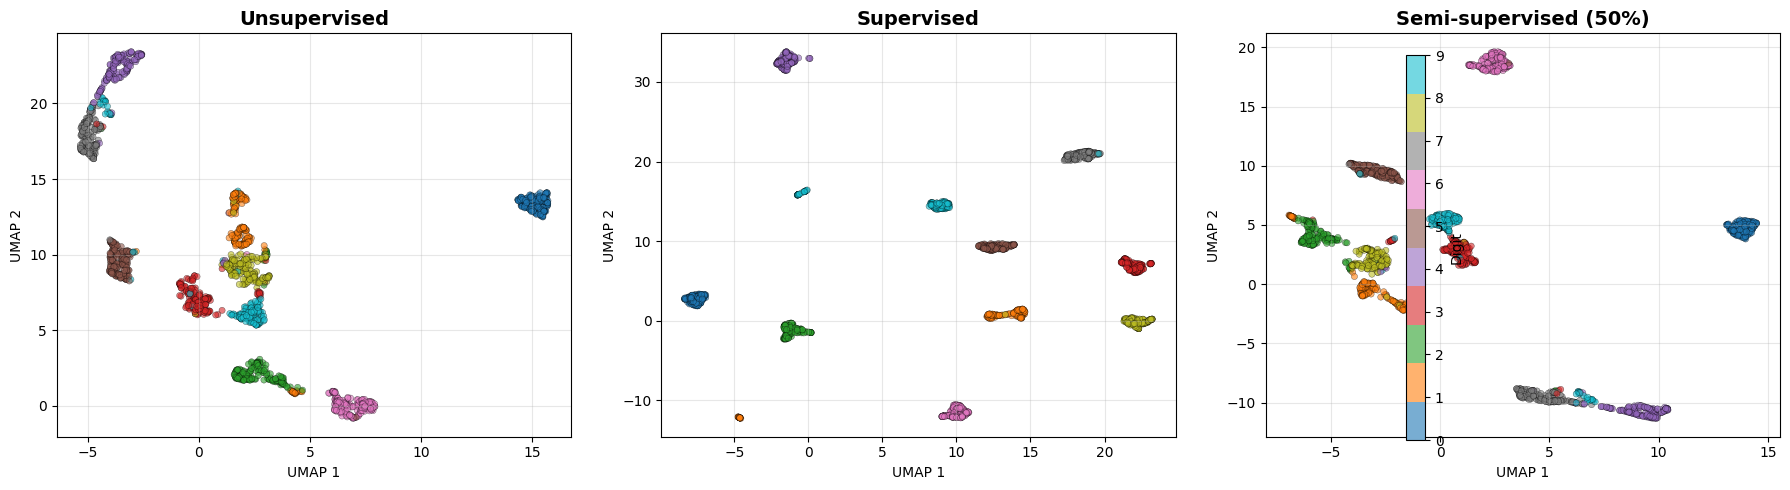

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

# Load data
digits = load_digits()
X_scaled = StandardScaler().fit_transform(digits.data)
y = digits.target

# Unsupervised UMAP
reducer_unsup = umap.UMAP(random_state=42)
embedding_unsup = reducer_unsup.fit_transform(X_scaled)

# Supervised UMAP (uses labels)
reducer_sup = umap.UMAP(random_state=42)
embedding_sup = reducer_sup.fit_transform(X_scaled, y=y)

# Semi-supervised UMAP (partial labels)
y_partial = y.copy()
np.random.seed(42)
mask = np.random.rand(len(y)) > 0.5  # Only 50% labeled
y_partial[mask] = -1  # -1 indicates unlabeled

reducer_semi = umap.UMAP(random_state=42)
embedding_semi = reducer_semi.fit_transform(X_scaled, y=y_partial)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, embedding, title in zip(axes,
                                [embedding_unsup, embedding_sup, embedding_semi],
                                ['Unsupervised', 'Supervised', 'Semi-supervised (50%)']):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1],
                        c=y, cmap='tab10', alpha=0.6, s=20,
                        edgecolors='black', linewidth=0.3)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes, label='Digit', ticks=range(10))
plt.tight_layout()
plt.show()

# Transforming New Data
Unlike t-SNE, UMAP can transform new data points:

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/50/kmf0fqmd2sv_hvt0nxtxgt_00000gp/T/ipykernel_89304/4269633286.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


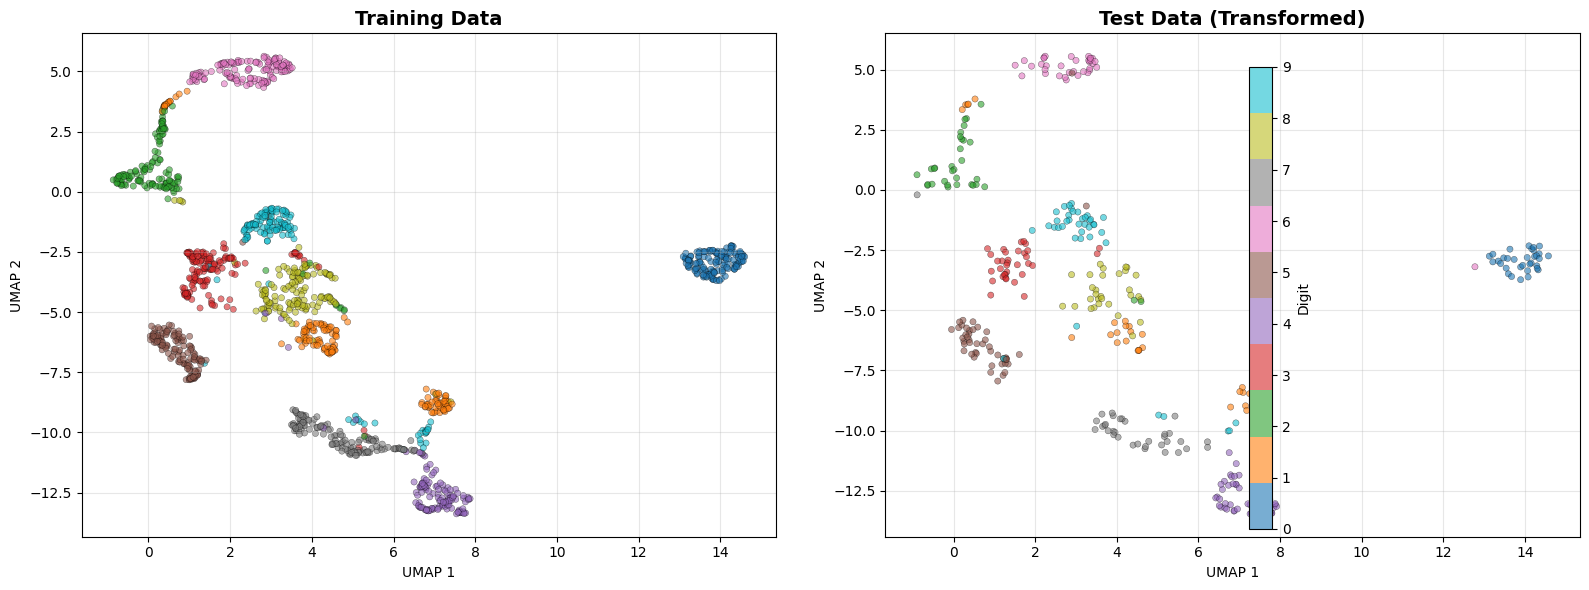

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit UMAP on training data
reducer = umap.UMAP(random_state=42)
embedding_train = reducer.fit_transform(X_train_scaled)

# Transform test data using the fitted model
embedding_test = reducer.transform(X_test_scaled)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training data
scatter_train = axes[0].scatter(embedding_train[:, 0], embedding_train[:, 1],
                                c=y_train, cmap='tab10', alpha=0.6, s=20,
                                edgecolors='black', linewidth=0.3)
axes[0].set_title('Training Data', fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].grid(True, alpha=0.3)

# Test data (transformed)
scatter_test = axes[1].scatter(embedding_test[:, 0], embedding_test[:, 1],
                               c=y_test, cmap='tab10', alpha=0.6, s=20,
                               edgecolors='black', linewidth=0.3)
axes[1].set_title('Test Data (Transformed)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter_test, ax=axes, label='Digit', ticks=range(10))
plt.tight_layout()
plt.show()

# UMAP for Clustering Visualization
Using UMAP to visualize clustering results:

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


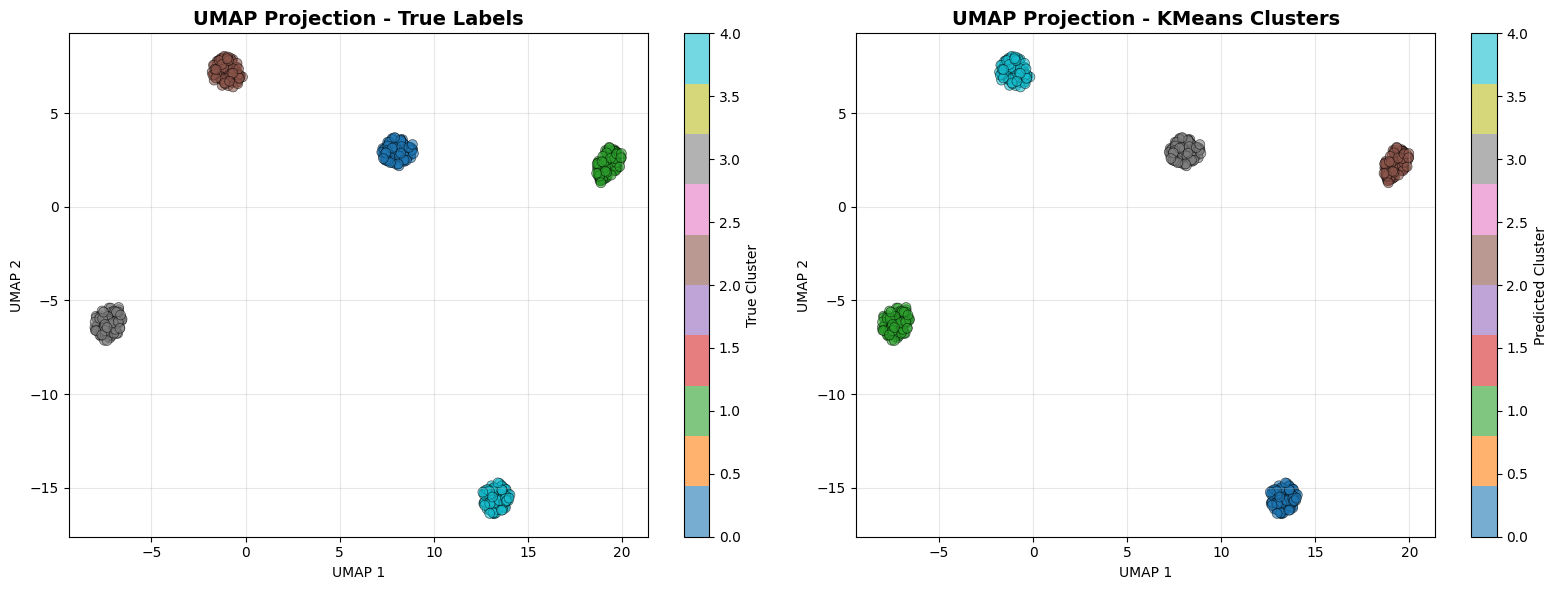

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap

# Generate synthetic high-dimensional data
X, y_true = make_blobs(n_samples=500, n_features=50, centers=5,
                       cluster_std=2.0, random_state=42)

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# UMAP projection
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# True labels
scatter_true = axes[0].scatter(embedding[:, 0], embedding[:, 1],
                               c=y_true, cmap='tab10', alpha=0.6, s=50,
                               edgecolors='black', linewidth=0.5)
axes[0].set_title('UMAP Projection - True Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter_true, ax=axes[0], label='True Cluster')

# Predicted labels
scatter_pred = axes[1].scatter(embedding[:, 0], embedding[:, 1],
                               c=y_pred, cmap='tab10', alpha=0.6, s=50,
                               edgecolors='black', linewidth=0.5)
axes[1].set_title('UMAP Projection - KMeans Clusters', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter_pred, ax=axes[1], label='Predicted Cluster')

plt.tight_layout()
plt.show()

# UMAP for Text Data
Example with text embeddings (simulated):

/Users/achuth.iyyatil/Code/personal/friendly-fortnight/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


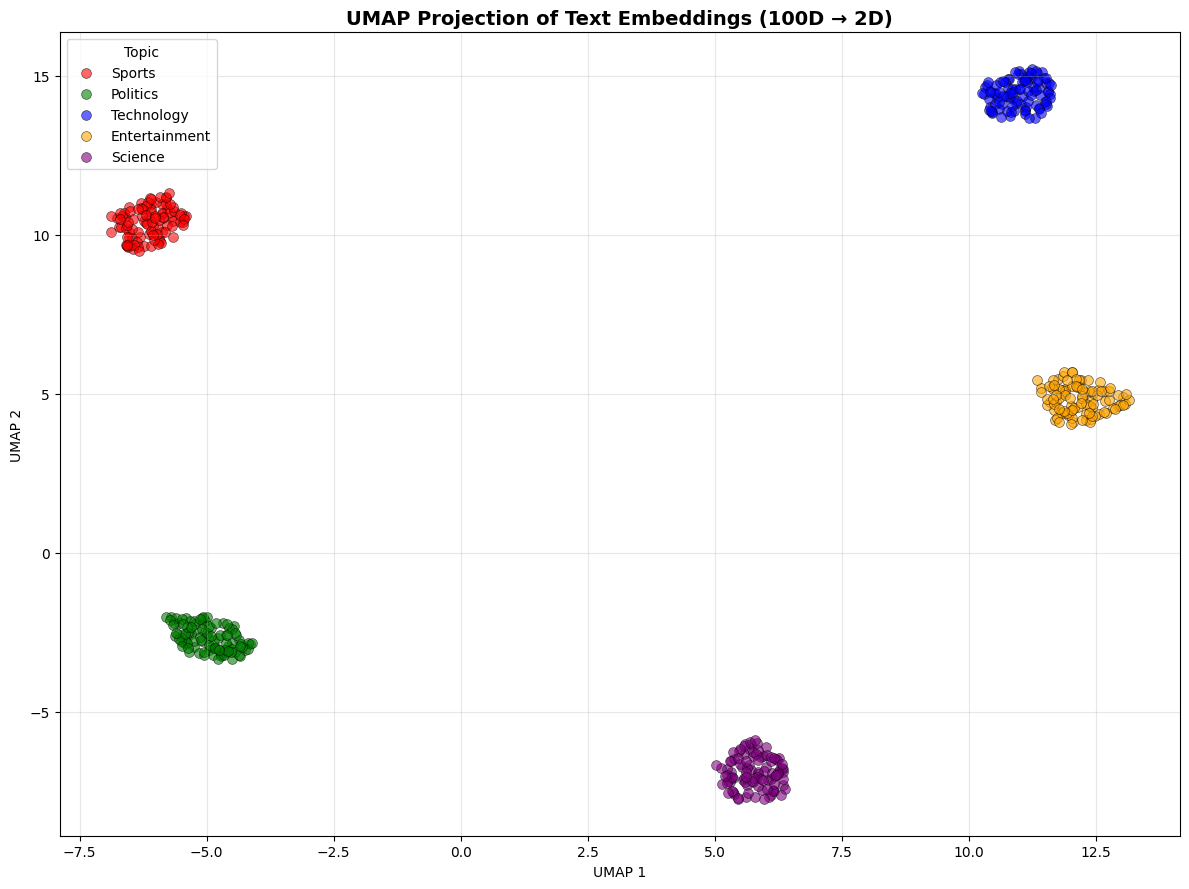

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

# Simulate text embeddings (e.g., from word2vec, BERT, etc.)
np.random.seed(42)
n_docs = 500
embedding_dim = 100

# Create 5 topic clusters
topics = ['Sports', 'Politics', 'Technology', 'Entertainment', 'Science']
n_per_topic = n_docs // len(topics)

embeddings = []
labels = []

for i, topic in enumerate(topics):
    # Create cluster center
    center = np.random.randn(embedding_dim) * 5
    # Generate documents around center
    topic_embeddings = center + np.random.randn(n_per_topic, embedding_dim)
    embeddings.append(topic_embeddings)
    labels.extend([i] * n_per_topic)

X = np.vstack(embeddings)
y = np.array(labels)

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(X_scaled)

# Visualize
plt.figure(figsize=(12, 9))
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, topic in enumerate(topics):
    mask = y == i
    plt.scatter(embedding_2d[mask, 0], embedding_2d[mask, 1],
                c=colors[i], label=topic, alpha=0.6, s=50,
                edgecolors='black', linewidth=0.5)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection of Text Embeddings (100D → 2D)', fontsize=14, fontweight='bold')
plt.legend(title='Topic')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Practical Applications

### 1. Exploratory Data Analysis
Quickly visualize high-dimensional datasets to understand structure and identify patterns.

### 2. Anomaly Detection
Outliers in UMAP projections often represent anomalies in the original space.

### 3. Feature Engineering
Use UMAP embeddings as features for downstream machine learning tasks.

### 4. Clustering Validation
Visualize whether your clustering algorithm found natural groupings.

### 5. Model Interpretation
Project model embeddings (e.g., from neural networks) to understand learned representations.

## Parameter Selection Guidelines

| Parameter | Typical Range | Effect | When to Adjust |
|-----------|--------------|--------|----------------|
| **n_neighbors** | 5-200 | Controls local vs global focus | Adjust based on dataset size and desired granularity |
| **min_dist** | 0.0-0.99 | Controls cluster tightness | Decrease for tighter clusters, increase for spread |
| **metric** | Various | Distance function | Match to your data type (cosine for text, euclidean for general) |
| **n_components** | 2-100 | Output dimensions | Use 2-3 for visualization, higher for preprocessing |

## Best Practices

### 1. Standardize Your Data
```python
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
```

### 2. Experiment with Parameters
Try different values and visually inspect results.

### 3. Use Appropriate Metrics
- **Euclidean**: General numeric data
- **Cosine**: Text embeddings, normalized vectors
- **Manhattan**: Sparse data
- **Hamming**: Binary data

### 4. Consider Computational Cost
UMAP is fast, but for very large datasets (>100k samples), consider:
- Subsampling for initial exploration
- Using approximate nearest neighbors
- Increasing n_jobs for parallel processing

### 5. Validate Results
Don't rely solely on visualizations. Validate with:
- Domain knowledge
- Clustering metrics
- Cross-validation on downstream tasks

## Common Pitfalls

1. **Over-interpreting distances**: Distances in UMAP space don't directly correspond to original distances
2. **Ignoring randomness**: Always set random_state for reproducibility
3. **Wrong metric choice**: Using Euclidean for text data or cosine for general numeric data
4. **Not standardizing**: Features with different scales will bias the results
5. **Treating 2D as complete**: Information is lost in dimensionality reduction

## UMAP vs Other Methods: Quick Reference

| Method | Speed | Local Structure | Global Structure | Reproducible | New Data |
|--------|-------|-----------------|------------------|--------------|----------|
| **PCA** | ⚡⚡⚡ | ❌ | ✅ | ✅ | ✅ |
| **t-SNE** | ⚠️ | ✅ | ❌ | ⚠️ | ❌ |
| **UMAP** | ⚡⚡ | ✅ | ✅ | ✅ | ✅ |